In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as tw
import pandas as pd
from google.colab import files

In [66]:
query = "citi bank"
tweets = []
limit = 1000
for tweet in tw.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date,tweet.username,tweet.content])
df = pd.DataFrame(tweets,columns=['Date','Username','Tweet'])
df

,Date,Username,Tweet
0,2022-05-27 10:20:28+00:00,muybuenoamigo,@NUGJPCHASE NUG! hopefully it’s almost over th...
1,2022-05-27 10:10:45+00:00,robertmeijer,I'm a gay man and frowned upon. Two lesbians h...
2,2022-05-27 10:08:35+00:00,Jmsdqn,"Inapply ko Citibank rewards card, binigay saki..."
3,2022-05-27 09:52:38+00:00,RussianP,@Citibank ain’t shit i can’t wait to get my mo...
4,2022-05-27 09:41:13+00:00,BLACKSTEMUSA,.@Citibank here's a question for you: The Rans...
...,...,...,...
995,2022-05-23 04:56:25+00:00,Ecomlootdeals,Apply ₹400 Off Coupon : BeatXp Exercise Bike A...
996,2022-05-23 04:55:28+00:00,ColoLawyer,#ForeignPolicy #USForeignPolicy @Citibank?
997,2022-05-23 04:50:16+00:00,BrandsIT_pl,Rzecznik MAP: Sasin spotka się w Davos z przed...
998,2022-05-23 04:42:59+00:00,sahilkhanttyl,otherwise there are a lot other options @Mashr...


In [67]:
df.to_csv('Tweets.csv')

In [68]:
files.download('Tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
import re
def Tweet_cleaner(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text)
  text = re.sub(r'#', '',text)
  text = re.sub(r'RT[\s]+', '',text)
  return text
df['Tweet'] = df['Tweet'].apply(Tweet_cleaner)
df

,Date,Username,Tweet
0,2022-05-27 10:20:28+00:00,muybuenoamigo,NUG! hopefully it’s almost over those bastard...
1,2022-05-27 10:10:45+00:00,robertmeijer,I'm a gay man and frowned upon. Two lesbians h...
2,2022-05-27 10:08:35+00:00,Jmsdqn,"Inapply ko Citibank rewards card, binigay saki..."
3,2022-05-27 09:52:38+00:00,RussianP,ain’t shit i can’t wait to get my money out y...
4,2022-05-27 09:41:13+00:00,BLACKSTEMUSA,. here's a question for you: The Ransom (inves...
...,...,...,...
995,2022-05-23 04:56:25+00:00,Ecomlootdeals,Apply ₹400 Off Coupon : BeatXp Exercise Bike A...
996,2022-05-23 04:55:28+00:00,ColoLawyer,ForeignPolicy USForeignPolicy ?
997,2022-05-23 04:50:16+00:00,BrandsIT_pl,Rzecznik MAP: Sasin spotka się w Davos z przed...
998,2022-05-23 04:42:59+00:00,sahilkhanttyl,otherwise there are a lot other options


In [70]:
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

df

,Date,Username,Tweet,Subjectivity,Polarity
0,2022-05-27 10:20:28+00:00,muybuenoamigo,NUG! hopefully it’s almost over those bastard...,0.000000,0.000000
1,2022-05-27 10:10:45+00:00,robertmeijer,I'm a gay man and frowned upon. Two lesbians h...,0.479167,0.416667
2,2022-05-27 10:08:35+00:00,Jmsdqn,"Inapply ko Citibank rewards card, binigay saki...",0.300000,0.200000
3,2022-05-27 09:52:38+00:00,RussianP,ain’t shit i can’t wait to get my money out y...,0.468750,-0.181250
4,2022-05-27 09:41:13+00:00,BLACKSTEMUSA,. here's a question for you: The Ransom (inves...,0.625000,-0.150000
...,...,...,...,...,...
995,2022-05-23 04:56:25+00:00,Ecomlootdeals,Apply ₹400 Off Coupon : BeatXp Exercise Bike A...,0.000000,0.000000
996,2022-05-23 04:55:28+00:00,ColoLawyer,ForeignPolicy USForeignPolicy ?,0.000000,0.000000
997,2022-05-23 04:50:16+00:00,BrandsIT_pl,Rzecznik MAP: Sasin spotka się w Davos z przed...,0.000000,0.000000
998,2022-05-23 04:42:59+00:00,sahilkhanttyl,otherwise there are a lot other options,0.375000,-0.125000


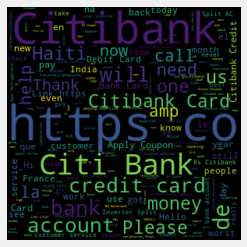

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
All_Tweets = ' '.join([ twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 300,height = 300,random_state = 45,max_font_size = 120).generate(All_Tweets)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [72]:
def Tweet_Analysis(score):
  if score<0:
    return 'Negative Tweet'
  elif score==0:
    return 'Neutral Tweet'
  else:
    return 'Positive Tweet'

df['Tweet_type'] = df['Polarity'].apply(Tweet_Analysis)
df

,Date,Username,Tweet,Subjectivity,Polarity,Tweet_type
0,2022-05-27 10:20:28+00:00,muybuenoamigo,NUG! hopefully it’s almost over those bastard...,0.000000,0.000000,Neutral Tweet
1,2022-05-27 10:10:45+00:00,robertmeijer,I'm a gay man and frowned upon. Two lesbians h...,0.479167,0.416667,Positive Tweet
2,2022-05-27 10:08:35+00:00,Jmsdqn,"Inapply ko Citibank rewards card, binigay saki...",0.300000,0.200000,Positive Tweet
3,2022-05-27 09:52:38+00:00,RussianP,ain’t shit i can’t wait to get my money out y...,0.468750,-0.181250,Negative Tweet
4,2022-05-27 09:41:13+00:00,BLACKSTEMUSA,. here's a question for you: The Ransom (inves...,0.625000,-0.150000,Negative Tweet
...,...,...,...,...,...,...
995,2022-05-23 04:56:25+00:00,Ecomlootdeals,Apply ₹400 Off Coupon : BeatXp Exercise Bike A...,0.000000,0.000000,Neutral Tweet
996,2022-05-23 04:55:28+00:00,ColoLawyer,ForeignPolicy USForeignPolicy ?,0.000000,0.000000,Neutral Tweet
997,2022-05-23 04:50:16+00:00,BrandsIT_pl,Rzecznik MAP: Sasin spotka się w Davos z przed...,0.000000,0.000000,Neutral Tweet
998,2022-05-23 04:42:59+00:00,sahilkhanttyl,otherwise there are a lot other options,0.375000,-0.125000,Negative Tweet


In [73]:
i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Positive Tweet'):
    count += 1
    i = i+1
print(count)

319


In [74]:
i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Positive Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1)I'm a gay man and frowned upon. Two lesbians having kids while inherently dedicating more time to themselves versus two men is better than tolerated, maybe even prized (see: Citibank). My testosterone is radically suppressed as a first line option. The sexism of space.

2)Inapply ko Citibank rewards card, binigay sakin BDO Titanium card haha

3) ain’t shit i can’t wait to get my money out you all’s trifling ass establishment. You have my money tired up for no reason. Banking is one thing that should not be outsourced to other countries. You let people who can’t even speak or understand English handle out money

4). here's a question for you: The Ransom (investigated &amp; published by NYT) has well-documented the total amount of money your CEOs stripped from Haiti. For a CENTURY. You're hiding this fact by not answering requests for your archival records. Why are you being dishonest? https://t.co/cW8m5gg7j9

5) Citi bank will issue card to me given i am currently in Surat and my offi

In [75]:
i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'], ascending  = 'False')
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Negative Tweet'):
    count += 1
    i = i+1
print(count)

161


In [76]:
i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Negative Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1)I'm a gay man and frowned upon. Two lesbians having kids while inherently dedicating more time to themselves versus two men is better than tolerated, maybe even prized (see: Citibank). My testosterone is radically suppressed as a first line option. The sexism of space.

2)Inapply ko Citibank rewards card, binigay sakin BDO Titanium card haha

3) ain’t shit i can’t wait to get my money out you all’s trifling ass establishment. You have my money tired up for no reason. Banking is one thing that should not be outsourced to other countries. You let people who can’t even speak or understand English handle out money

4). here's a question for you: The Ransom (investigated &amp; published by NYT) has well-documented the total amount of money your CEOs stripped from Haiti. For a CENTURY. You're hiding this fact by not answering requests for your archival records. Why are you being dishonest? https://t.co/cW8m5gg7j9

5) Citi bank will issue card to me given i am currently in Surat and my offi

In [77]:
i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'], ascending  = 'False')
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Neutral Tweet'):
    count += 1
    i = i+1
print(count)

520


In [78]:
i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Neutral Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1)I'm a gay man and frowned upon. Two lesbians having kids while inherently dedicating more time to themselves versus two men is better than tolerated, maybe even prized (see: Citibank). My testosterone is radically suppressed as a first line option. The sexism of space.

2)Inapply ko Citibank rewards card, binigay sakin BDO Titanium card haha

3) ain’t shit i can’t wait to get my money out you all’s trifling ass establishment. You have my money tired up for no reason. Banking is one thing that should not be outsourced to other countries. You let people who can’t even speak or understand English handle out money

4). here's a question for you: The Ransom (investigated &amp; published by NYT) has well-documented the total amount of money your CEOs stripped from Haiti. For a CENTURY. You're hiding this fact by not answering requests for your archival records. Why are you being dishonest? https://t.co/cW8m5gg7j9

5) Citi bank will issue card to me given i am currently in Surat and my offi

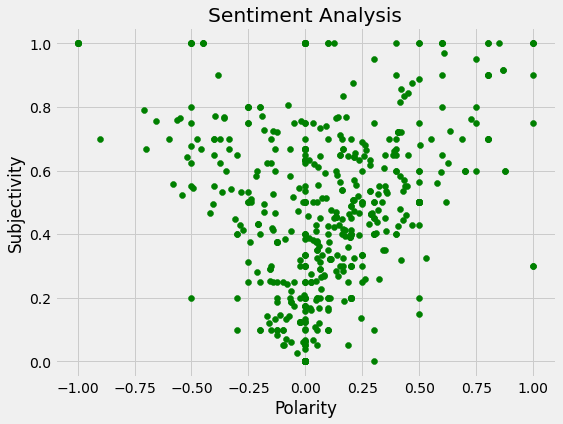

In [79]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [80]:
positive_tweets = df[df['Tweet_type'] == 'Positive Tweet']
round((positive_tweets.shape[0] / df.shape[0]) * 100 , 2)

31.9

In [81]:
negative_tweets = df[df['Tweet_type'] == 'Negative Tweet']
round((negative_tweets.shape[0] / df.shape[0]) * 100 , 2)

16.1

In [82]:
neutral_tweets = df[df['Tweet_type'] == 'Neutral Tweet']
round((neutral_tweets.shape[0] / df.shape[0]) * 100 , 2)

52.0

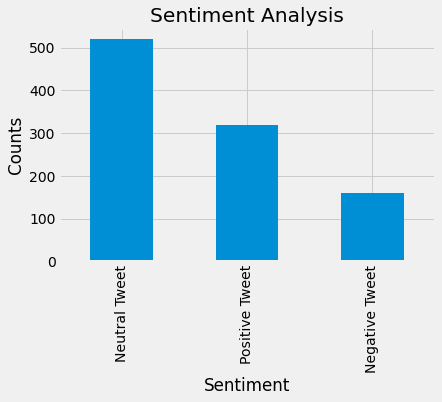

In [83]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df['Tweet_type'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Tweet_type'].value_counts().plot(kind = 'bar')
plt.show()